In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir_path = "/content/drive/MyDrive/IBM/Fruit Dataset/"

In [3]:
#Importing Library
import numpy as np
import pandas as pd
import cv2
from PIL import Image

In [4]:
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_77.jpg
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_77.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_83.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_89.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_82.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_88.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_84.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_86.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_93.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/banana_79.jpg
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_81.jpg
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_93.jpg
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/banana_80.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/banana_79.xml
/content/drive/MyDrive/IBM/Fruit Dataset/test/test/apple_78.xml
/content/drive/MyDrive/IBM/Fruit Data

In [5]:
images  =  []       
labels  =  [] 
train_path  =  '/content/drive/MyDrive/IBM/Fruit Dataset/train/train'
for filename in os.listdir('/content/drive/MyDrive/IBM/Fruit Dataset/train/train'):
    if filename.split('.')[1]=='jpg':
        img  =  cv2.imread(os.path.join(train_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        labels.append(filename.split('_')[0])
        images.append(np.array(img_arr))

In [6]:
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [7]:
from sklearn.preprocessing import LabelEncoder
lb_encod  =  LabelEncoder()
labels = pd.DataFrame(labels)
labels = lb_encod.fit_transform(labels[0])
labels

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3])

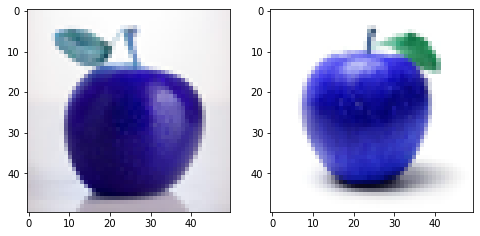

In [8]:
#Visualizing image
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,8))
ax = figure.add_subplot(121)
ax.imshow(images[0])
bx = figure.add_subplot(122)
bx.imshow(images[60])
plt.show()

In [9]:
#Saving the image array and corresponding labels
images = np.array(images)
np.save("image",images)
np.save("labels",labels)

In [12]:
#Loading the images and labels that we have saved above
image = np.load("image.npy",allow_pickle = True)
labels = np.load("labels.npy",allow_pickle = True)

In [13]:
img_shape  = np.arange(image.shape[0])
np.random.shuffle(img_shape)
image = image[img_shape]
labels = labels[img_shape]

In [14]:
#define traing & testing data
num_classes = len(np.unique(labels))
len_data = len(image)
x_train, x_test = image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]
y_train,y_test = labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

import keras
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

In [16]:
l2_reg = 0.001
opt = Adam(lr = 0.001)

#Defining the CNN Model
cnn_model  =  Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = (50,50, 3), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.1))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(16, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
#Compiling the model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
#Save the model
cnn_model.save('fruit.h5')
#Training the CNN Model
file1 = 'fruit.h5'
checkpoint = ModelCheckpoint(file1, monitor='loss', verbose=1, save_best_only=True, mode='min')
#Fit the model
history = cnn_model.fit(x_train,y_train,batch_size = 128,epochs = 110,verbose = 1,validation_split = 0.33)

Epoch 1/110
2/2 [==============================] - 2s 543ms/step - loss: 17.7911 - accuracy: 0.3403 - val_loss: 30.2132 - val_accuracy: 0.2639
Epoch 2/110
2/2 [==============================] - 0s 140ms/step - loss: 25.1337 - accuracy: 0.3333 - val_loss: 12.0501 - val_accuracy: 0.2639
Epoch 3/110
2/2 [==============================] - 0s 151ms/step - loss: 8.1765 - accuracy: 0.3611 - val_loss: 3.4753 - val_accuracy: 0.2083
Epoch 4/110
2/2 [==============================] - 0s 134ms/step - loss: 2.6353 - accuracy: 0.2431 - val_loss: 2.1366 - val_accuracy: 0.4167
Epoch 5/110
2/2 [==============================] - 0s 140ms/step - loss: 1.9087 - accuracy: 0.3611 - val_loss: 1.7240 - val_accuracy: 0.3056
Epoch 6/110
2/2 [==============================] - 0s 141ms/step - loss: 1.6510 - accuracy: 0.3889 - val_loss: 1.7251 - val_accuracy: 0.2500
Epoch 7/110
2/2 [==============================] - 0s 138ms/step - loss: 1.7327 - accuracy: 0.3542 - val_loss: 1.7096 - val_accuracy: 0.2639
Epoch 8/1

In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 49, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0

In [19]:
#Check the performance
scores  =  cnn_model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1/1 [==============================] - 0s 39ms/step - loss: 1.4974 - accuracy: 0.7917
Test loss: 1.4974473714828491
Test accuracy: 0.7916666865348816


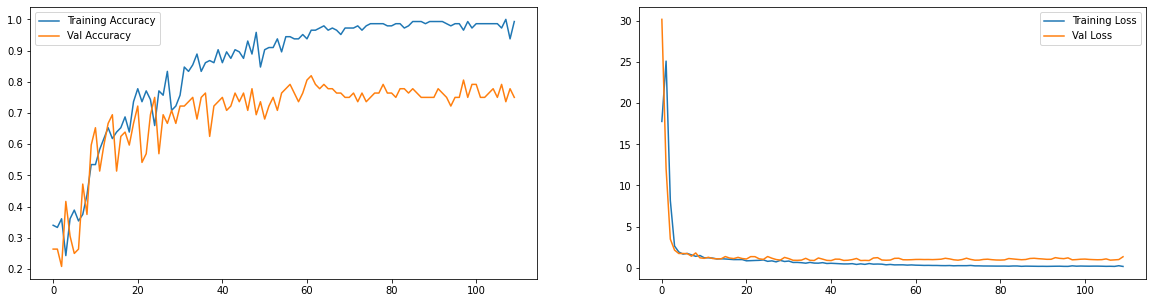

In [24]:
figure = plt.figure(figsize = (20,5))
ax = figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx = figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])